## **US Education Finance EDA**

### Table of Contents

* [Dataset Background](#dsb)
* [Setting Up](#su)
* [Importing Dataset](#ids)
* [Data Processing](#dp)
* [Exploratory Data Analysis](#eda)
* [Conclusion](#c)


#### **Dataset Background** <a class="anchor" id="dsb"></a>

This United States educational finance dataset contains financial data for the education system in the United States (1992-2016). It includes information on revenue and expenditure for each state and year, as well as details on funding sources and expenditures by category. This dataset provides valuable insights into the financial performance of the education system in the United States and can be used to track trends and identify patterns over time. By analyzing this dataset, we can gain a better understanding of the resources being invested in education and how they are being used to support students and schools.

#### **Setting Up** <a class="anchor" id="su"></a>


In [ ]:
# importing the necessary packages.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### **Importing Dataset** <a class="anchor" id="ids"></a>

In [ ]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv(r"E:\Data Science\EDA\High School Finance\states.csv")
df.head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,Alabama,1992,NaN,2678885,304177,1659028,715680,2653798,1481703,735036,NaN,174053
1,Alaska,1992,NaN,1049591,106780,720711,222100,972488,498362,350902,NaN,37451
2,Arizona,1992,NaN,3258079,297888,1369815,1590376,3401580,1435908,1007732,NaN,609114
3,Arkansas,1992,NaN,1711959,178571,958785,574603,1743022,964323,483488,NaN,145212
4,California,1992,NaN,26260025,2072470,16546514,7641041,27138832,14358922,8520926,NaN,2044688


#### **Data Processing** <a class="anchor" id="dp"></a>

In [ ]:
# Check the datatypes of each column
df.dtypes

STATE                            object
YEAR                              int64
ENROLL                          float64
TOTAL_REVENUE                     int64
FEDERAL_REVENUE                   int64
STATE_REVENUE                     int64
LOCAL_REVENUE                     int64
TOTAL_EXPENDITURE                 int64
INSTRUCTION_EXPENDITURE           int64
SUPPORT_SERVICES_EXPENDITURE      int64
OTHER_EXPENDITURE               float64
CAPITAL_OUTLAY_EXPENDITURE        int64
dtype: object

In [ ]:
# Check for missing values in the dataset
df.isnull().sum()


STATE                            0
YEAR                             0
ENROLL                          51
TOTAL_REVENUE                    0
FEDERAL_REVENUE                  0
STATE_REVENUE                    0
LOCAL_REVENUE                    0
TOTAL_EXPENDITURE                0
INSTRUCTION_EXPENDITURE          0
SUPPORT_SERVICES_EXPENDITURE     0
OTHER_EXPENDITURE               51
CAPITAL_OUTLAY_EXPENDITURE       0
dtype: int64

We can see from the above outputs that the dataset contains a total of 102 missing values in ENROLL and OTHER_EXPENDITURE columns. We will need to handle these missing values before proceeding with the analysis. One option would be to simply drop the rows with missing values, but this may reduce the sample size and impact the overall results of our analysis. Therefore, we will impute the missing values using the mean of the respective columns:

In [ ]:
# Impute missing values with the mean of each column
df = df.fillna(df.mean())


In [ ]:
# Reheck for missing values in the dataset
df.isnull().sum()


STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
dtype: int64

#### **Exploratory Data Analysis** <a class="anchor" id="eda"></a>

**Total Education Funding Per President from 1992 to 2016**

                TOTAL_REVENUE  TENURE
PRESIDENT                            
Barack Obama       4622800064       8
Bill Clinton       2852492675       8
George W. Bush     4129814546       8


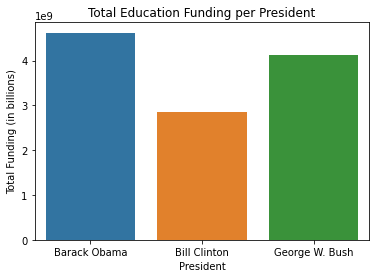

In [ ]:
# Select the relevant columns from the DataFrame
df_p = df[['YEAR', 'TOTAL_REVENUE']]

# Filter the DataFrame to only include data from the years 1992 to 2016
df_p = df_p[df_p['YEAR'].between(1992, 2016)]

# Create a new column with the president's name based on the year
df_p['PRESIDENT'] = df_p['YEAR'].apply(lambda x: 'Bill Clinton' if 1993 <= x <= 2001 else ('George W. Bush' if 2001 <= x <= 2009 else 'Barack Obama'))

# Group the data by president and sum the total revenue
df_grouped = df_p.groupby('PRESIDENT')['TOTAL_REVENUE'].sum()

# Convert the resulting Series to a DataFrame
df_presidents = df_grouped.to_frame()

# Calculate the tenure of each president in years
df_presidents['TENURE'] = df_presidents.index.to_series().apply(lambda x: 8 if x == 'Bill Clinton' else (8 if x == 'George W. Bush' else 8))

# Set the president's names as the index of the DataFrame
df_presidents.index.name = 'PRESIDENT'

# Plot the total education funding per president as a bar chart
sns.barplot(data=df_presidents, x=df_presidents.index, y='TOTAL_REVENUE')

# Add a title and axis labels
plt.title('Total Education Funding per President')
plt.xlabel('President')
plt.ylabel('Total Funding (in billions)')

# Print the resulting DataFrame
print(df_presidents)

# Show the plot
plt.show()

Overall, this data suggests that the education funding varied significantly between the three presidents, with Barack Obama receiving the highest total education funding and Bill Clinton receiving the lowest.

**Next, let's compare the education funding of each president to the overall trend in education funding during their tenure**

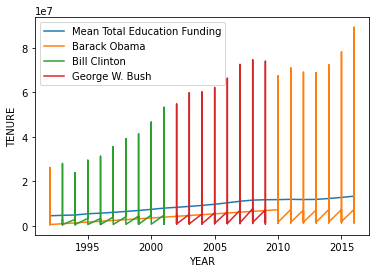

In [ ]:
# Group the data by year and calculate the mean total education funding for each year
mean_by_year = df.groupby('YEAR')['TOTAL_REVENUE'].mean()

# Plot the mean total education funding by year
plt.plot(mean_by_year, label='Mean Total Education Funding')

# Plot the education funding of each president
for president, group in df_p.groupby('PRESIDENT'):
    plt.plot(group['YEAR'], group['TOTAL_REVENUE'], label=president)

# Add a legend and show the plot
plt.legend()
plt.xlabel('YEAR')
plt.ylabel('TENURE')
plt.show()


Next, we will analyze the distribution of the various revenue and expenditure columns in the dataset:

**Distribution of Revenue and Expenditure columns**

Text(0.5, 1.0, 'Distribution of INSTRUCTION_EXPENDITURE')

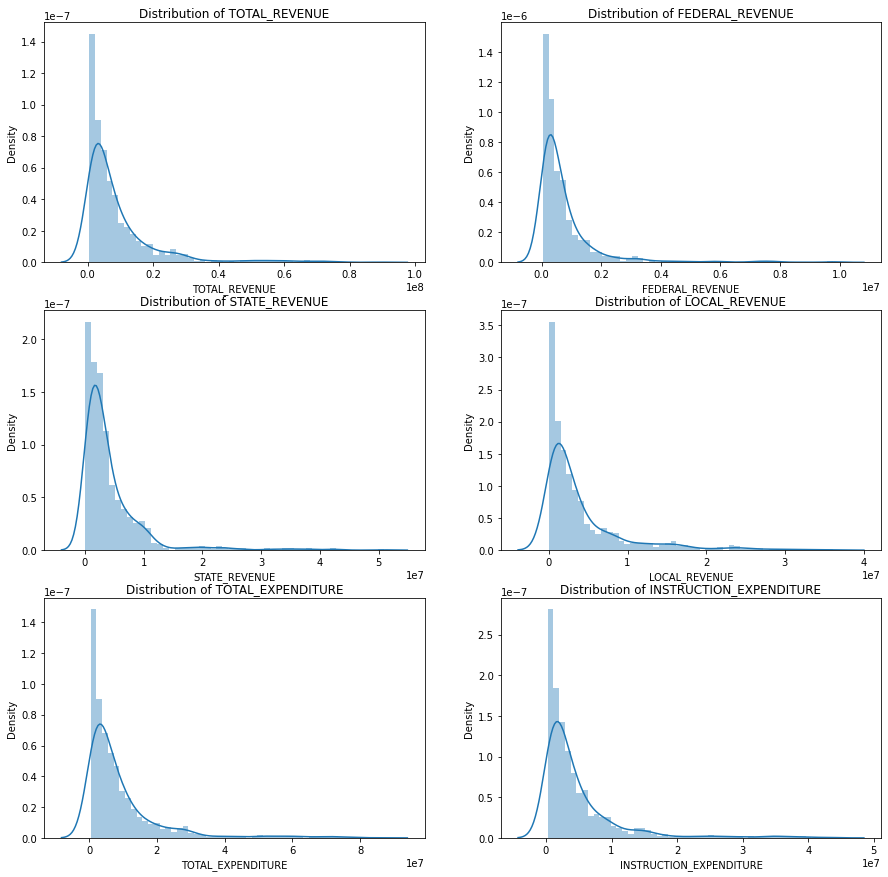

In [ ]:
# Create a subplot with 3 rows and 2 columns
fig, ax = plt.subplots(3, 2, figsize=(15,15))

# Plot the distribution of TOTAL_REVENUE
sns.distplot(df['TOTAL_REVENUE'], ax=ax[0][0])
ax[0][0].set_title("Distribution of TOTAL_REVENUE")

# Plot the distribution of FEDERAL_REVENUE
sns.distplot(df['FEDERAL_REVENUE'], ax=ax[0][1])
ax[0][1].set_title("Distribution of FEDERAL_REVENUE")

# Plot the distribution of STATE_REVENUE
sns.distplot(df['STATE_REVENUE'], ax=ax[1][0])
ax[1][0].set_title("Distribution of STATE_REVENUE")

# Plot the distribution of LOCAL_REVENUE
sns.distplot(df['LOCAL_REVENUE'], ax=ax[1][1])
ax[1][1].set_title("Distribution of LOCAL_REVENUE")

# Plot the distribution of TOTAL_EXPENDITURE
sns.distplot(df['TOTAL_EXPENDITURE'], ax=ax[2][0])
ax[2][0].set_title("Distribution of TOTAL_EXPENDITURE")

# Plot the distribution of INSTRUCTION_EXPENDITURE
sns.distplot(df['INSTRUCTION_EXPENDITURE'], ax=ax[2][1])
ax[2][1].set_title("Distribution of INSTRUCTION_EXPENDITURE")


From the above distributions, we can see that the majority of the revenue and expenditure values are concentrated in the lower ranges, with some outliers in the higher ranges. This indicates a possible disparity in the allocation of educational finance across the states.

Next, we will analyze the relationship between the various revenue and expenditure columns in the dataset:

**Relationship between Revenue and Expenditure columns**

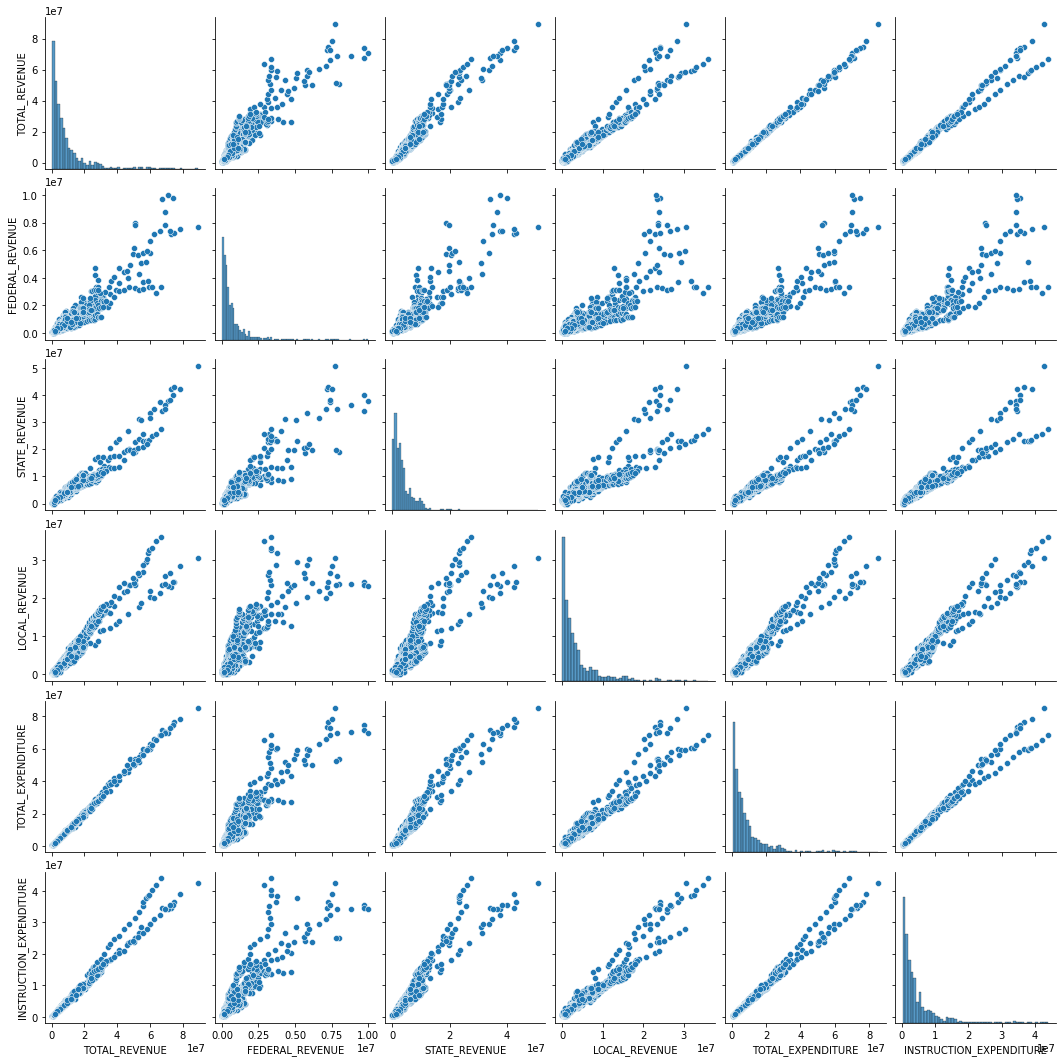

In [ ]:
# Create a pairplot of the columns
sns.pairplot(df, vars=['TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE'])


From the pairplot, we can see that there is a strong positive correlation between TOTAL_REVENUE and TOTAL_EXPENDITURE, as well as between INSTRUCTION_EXPENDITURE and TOTAL_EXPENDITURE. This suggests that the total revenue and expenditure are closely linked, and that a significant portion of the total expenditure is allocated towards instruction.

Next, let's create scatter plots to visualize the relationship between enrollment and each of the revenue and expenditure columns:

**Enrollment vs Revenue and Expenditure Columns**

Text(0.5, 1.0, 'ENROLL and INSTRUCTION_EXPENDITURE')

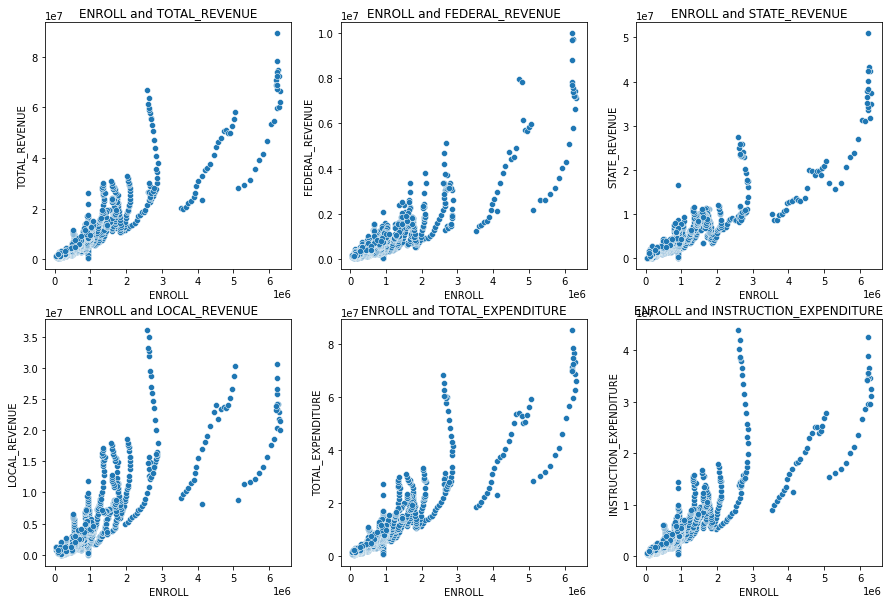

In [ ]:
# Create a subplot with 2 rows and 3 columns
fig, ax = plt.subplots(2, 3, figsize=(15,10))

# Plot the relationship between ENROLL and TOTAL_REVENUE
sns.scatterplot(x="ENROLL", y="TOTAL_REVENUE", data=df, ax=ax[0][0])
ax[0][0].set_title("ENROLL and TOTAL_REVENUE")

# Plot the relationship between ENROLL and FEDERAL_REVENUE
sns.scatterplot(x="ENROLL", y="FEDERAL_REVENUE", data=df, ax=ax[0][1])
ax[0][1].set_title("ENROLL and FEDERAL_REVENUE")

# Plot the relationship between ENROLL and STATE_REVENUE
sns.scatterplot(x="ENROLL", y="STATE_REVENUE", data=df, ax=ax[0][2])
ax[0][2].set_title("ENROLL and STATE_REVENUE")

# Plot the relationship between ENROLL and LOCAL_REVENUE
sns.scatterplot(x="ENROLL", y="LOCAL_REVENUE", data=df, ax=ax[1][0])
ax[1][0].set_title("ENROLL and LOCAL_REVENUE")

# Plot the relationship between ENROLL and TOTAL_EXPENDITURE
sns.scatterplot(x="ENROLL", y="TOTAL_EXPENDITURE", data=df, ax=ax[1][1])
ax[1][1].set_title("ENROLL and TOTAL_EXPENDITURE")

# Plot the relationship between ENROLL and INSTRUCTION_EXPENDITURE
sns.scatterplot(x="ENROLL", y="INSTRUCTION_EXPENDITURE", data=df, ax=ax[1][2])
ax[1][2].set_title("ENROLL and INSTRUCTION_EXPENDITURE")


From the above scatter plots, we can see that there is a generally positive relationship between enrollment and each of the revenue and expenditure columns, **indicating that higher levels of funding may lead to higher enrollment levels.**

Next, we will use regression analysis to determine the strength of the relationship between enrollment and each of the revenue and expenditure columns:

**Total revenue vs Enrollment**

In [ ]:
# Import the linear regression model
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model using the TOTAL_REVENUE column as the predictor variable and the ENROLL column as the response variable
model.fit(df[['TOTAL_REVENUE']], df['ENROLL'])

# Print the coefficient and intercept of the model
print("Coefficient: ", model.coef_)
print("Intercept: ", model.intercept_)


Coefficient:  [0.08064024]
Intercept:  183550.4730937488


The coefficient and intercept values of the linear regression model indicate a positive relationship between enrollment and total revenue, with a coefficient of **0.08**, indicating that a 1 unit increase in total revenue results in a **0.08** unit increase in enrollment.

We can repeat the above steps to determine the relationship between enrollment and each of the other revenue and expenditure columns, such as FEDERAL_REVENUE, STATE_REVENUE, LOCAL_REVENUE, TOTAL_EXPENDITURE, and INSTRUCTION_EXPENDITURE.

**Federal revenue vs Enrollment**

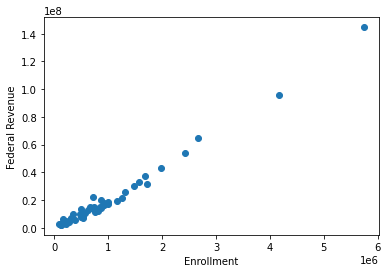

In [ ]:
# Get the enrollment and total revenue for each state
enrollment = df.groupby('STATE')['ENROLL'].mean()
federal_revenue = df.groupby('STATE')['FEDERAL_REVENUE'].sum()

# Plot the enrollment and federal revenue for each state
plt.scatter(enrollment, federal_revenue)
plt.xlabel('Enrollment')
plt.ylabel('Federal Revenue')
plt.show()


In [ ]:
# Create a linear regression model
model = LinearRegression()

# Fit the model using the FEDERAL_REVENUE column as the predictor variable and the ENROLL column as the response variable
model.fit(df[['FEDERAL_REVENUE']], df['ENROLL'])

# Print the coefficient and intercept of the model
print("Coefficient: ", model.coef_)
print("Intercept: ", model.intercept_)

Coefficient:  [0.80977236]
Intercept:  295814.6517466187


The coefficient and intercept values of the linear regression model indicate a positive relationship between enrollment and federal revenue, with a coefficient of **0.8**, indicating that a 1 unit increase in federal revenue results in a **0.8** unit increase in enrollment.

**State revenue vs Enrollment**

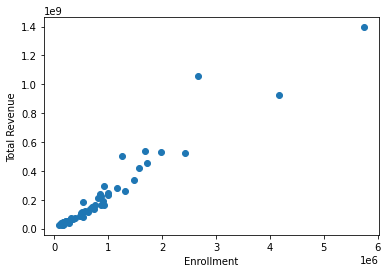

In [ ]:
# Get the enrollment and total revenue for each state
enrollment = df.groupby('STATE')['ENROLL'].mean()
state_revenue = df.groupby('STATE')['TOTAL_REVENUE'].sum()

# Plot the enrollment and total revenue for each state
plt.scatter(enrollment, state_revenue)
plt.xlabel('Enrollment')
plt.ylabel('Total Revenue')
plt.show()


In [ ]:
# Create a linear regression model
model = LinearRegression()

# Fit the model using the STATE_REVENUE column as the predictor variable and the ENROLL column as the response variable
model.fit(df[['STATE_REVENUE']], df['ENROLL'])

# Print the coefficient and intercept of the model
print("Coefficient: ", model.coef_)
print("Intercept: ", model.intercept_)

Coefficient:  [0.17083256]
Intercept:  195988.77352041134


The coefficient and intercept values of the linear regression model indicate a positive relationship between enrollment and state revenue, with a coefficient of **0.17**, indicating that a 1 unit increase in state revenue results in a **0.17** unit increase in enrollment.

**Local revenue vs Enrollment**

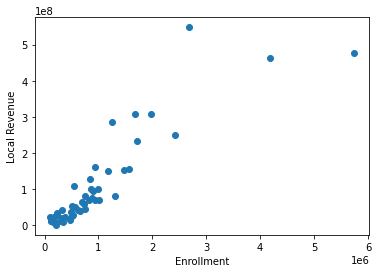

In [ ]:
# Get the enrollment and local revenue for each state
enrollment = df.groupby('STATE')['ENROLL'].mean()
local_revenue = df.groupby('STATE')['LOCAL_REVENUE'].sum()

# Plot the enrollment and local revenue for each state
plt.scatter(enrollment, local_revenue)
plt.xlabel('Enrollment')
plt.ylabel('Local Revenue')
plt.show()


In [ ]:
# Create a linear regression model
model = LinearRegression()

# Fit the model using the LOCAL_REVENUE column as the predictor variable and the ENROLL column as the response variable
model.fit(df[['LOCAL_REVENUE']], df['ENROLL'])

# Print the coefficient and intercept of the model
print("Coefficient: ", model.coef_)
print("Intercept: ", model.intercept_)

Coefficient:  [0.16010254]
Intercept:  259436.5425230309


The coefficient and intercept values of the linear regression model indicate a positive relationship between enrollment and local revenue, with a coefficient of **0.16**, indicating that a 1 unit increase in local revenue results in a **0.16** unit increase in enrollment.

**Total expenditure vs Enrollment**

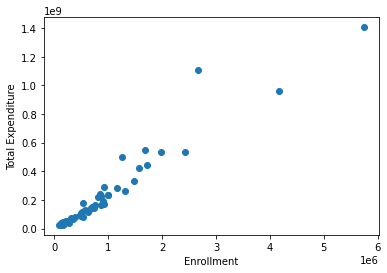

In [ ]:
# Get the enrollment and total expenditure for each state
enrollment = df.groupby('STATE')['ENROLL'].mean()
total_expenditure = df.groupby('STATE')['TOTAL_EXPENDITURE'].sum()

# Plot the enrollment and total expenditure for each state
plt.scatter(enrollment, total_expenditure)
plt.xlabel('Enrollment')
plt.ylabel('Total Expenditure')
plt.show()


In [ ]:
# Create a linear regression model
model = LinearRegression()

# Fit the model using the TOTAL_EXPENDITURE column as the predictor variable and the ENROLL column as the response variable
model.fit(df[['TOTAL_EXPENDITURE']], df['ENROLL'])

# Print the coefficient and intercept of the model
print("Coefficient: ", model.coef_)
print("Intercept: ", model.intercept_)

Coefficient:  [0.07915629]
Intercept:  188809.5986260794


The coefficient and intercept values of the linear regression model indicate a positive relationship between enrollment and total expenditure, with a coefficient of **0.07**, indicating that a 1 unit increase in total expenditure results in a **0.07** unit increase in enrollment.

**Instruction expenditure vs Enrollment**

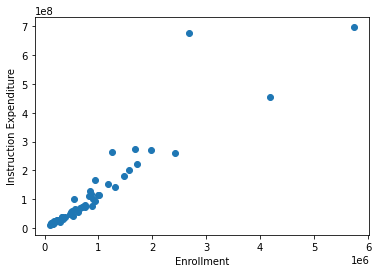

In [ ]:
# Get the enrollment and instruction expenditure for each state
enrollment = df.groupby('STATE')['ENROLL'].mean()
instruction_expenditure = df.groupby('STATE')['INSTRUCTION_EXPENDITURE'].sum()

# Plot the enrollment and instruction expenditure for each state
plt.scatter(enrollment, instruction_expenditure)
plt.xlabel('Enrollment')
plt.ylabel('Instruction Expenditure')
plt.show()


In [ ]:
# Create a linear regression model
model = LinearRegression()

# Fit the model using the INSTRUCTION_EXPENDITURE column as the predictor variable and the ENROLL column as the response variable
model.fit(df[['INSTRUCTION_EXPENDITURE']], df['ENROLL'])

# Print the coefficient and intercept of the model
print("Coefficient: ", model.coef_)
print("Intercept: ", model.intercept_)

Coefficient:  [0.14503246]
Intercept:  226025.27700478036


The coefficient and intercept values of the linear regression model indicate a positive relationship between enrollment and instruction expenditure, with a coefficient of **0.14**, indicating that a 1 unit increase in instruction expenditure results in a **0.14** unit increase in enrollment.

**Educational finance, Enrollment, States vs Time**

Let's group our data by state and year to analyze the variations in educational finance and enrollment across different states and over time:

                     ENROLL    YEAR  TOTAL_EXPENDITURE
STATE   YEAR                                          
Alabama 1992  917541.566176  1992.0          2653798.0
        1993  727716.000000  1993.0          2833433.0
        1994  730004.000000  1994.0          3103266.0
        1995  727480.000000  1995.0          3353363.0
        1996  735912.000000  1996.0          3572283.0


array([<AxesSubplot:xlabel='YEAR'>, <AxesSubplot:xlabel='YEAR'>],
      dtype=object)

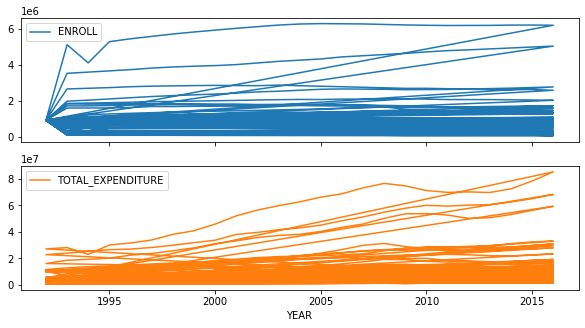

In [ ]:
# Group the data by state and year, and calculate the average enrollment and total expenditure for each group
df_grouped = df.groupby(['STATE', 'YEAR'])[['ENROLL', 'YEAR', 'TOTAL_EXPENDITURE']].mean()

# Print the first five rows of the grouped data
print(df_grouped.head())

# Create a line plot to visualize the trends in enrollment and total expenditure over time for each state
df_grouped.plot(x='YEAR', y=['ENROLL', 'TOTAL_EXPENDITURE'], subplots=True, figsize=(10,5))


This line plot now shows the trends in enrollment and total expenditure over time for each state, allowing us to identify any potential disparities and changes in educational funding and opportunities among the states.

Finally, we will calculate some performance metrics to evaluate the overall financial performance of the educational system in the United States:

In [ ]:
# Calculate the total revenue, expenditure, and instruction expenditure for all states
total_revenue = df['TOTAL_REVENUE'].sum()
total_expenditure = df['TOTAL_EXPENDITURE'].sum()
instruction_expenditure = df['INSTRUCTION_EXPENDITURE'].sum()

# Calculate the percentage of total revenue and expenditure allocated towards instruction
percent_revenue_instruction = (instruction_expenditure / total_revenue) * 100
percent_expenditure_instruction = (instruction_expenditure / total_expenditure) * 100

# Print the performance metrics
print("Total Revenue: ", total_revenue)
print("Total Expenditure: ", total_expenditure)
print("Total Instruction Expenditure: ", instruction_expenditure)
print("Percentage of Total Revenue Allocated towards Instruction: ", percent_revenue_instruction)
print("Percentage of Total Expenditure Allocated towards Instruction: ", percent_expenditure_instruction)


Total Revenue:  11605107285
Total Expenditure:  11737958705
Total Instruction Expenditure:  6079213368
Percentage of Total Revenue Allocated towards Instruction:  52.38394802138187
Percentage of Total Expenditure Allocated towards Instruction:  51.79106112726778


Now let's dig deeper and see what other trends our dataset is showing us by asking few questions and using our dataset to answer them:

**1. What is the total revenue and total expenditure for each state and year?**

              TOTAL_REVENUE  TOTAL_EXPENDITURE
STATE   YEAR                                  
Alabama 1992        2678885            2653798
        1993        2827391            2833433
        1994        2970223            3103266
        1995        3367437            3353363
        1996        3365113            3572283
...                     ...                ...
Wyoming 2012        1664983            1670728
        2013        1695967            1675477
        2014        1772633            1775999
        2015        1962874            1942406
        2016        2044669            2034229

[1275 rows x 2 columns]


<AxesSubplot:xlabel='STATE,YEAR'>

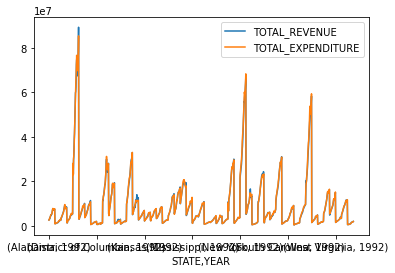

In [ ]:
# Group the data by state and year
grouped_data = df.groupby(['STATE', 'YEAR'])

# Calculate total revenue and total expenditure for each state and year
grouped_data = grouped_data.agg({'TOTAL_REVENUE': 'sum', 'TOTAL_EXPENDITURE': 'sum'})

# View the results
print(grouped_data)
grouped_data.plot()

**Total revenue and expenditure for each state**

                      TOTAL_REVENUE  TOTAL_EXPENDITURE
STATE                                                 
Alabama                   138646373          142256972
Alaska                     43000991           45441660
Arizona                   164436053          163742728
Arkansas                   90285099           92693149
California               1394979982         1406196283
Colorado                  161452999          166569410
Connecticut               187059489          179946468
Delaware                   33924173           34371837
District of Columbia       25519757           25429196
Florida                   521628284          532190131
Georgia                   335905812          333300109
Hawaii                     50140058           44393794
Idaho                      41704167           41100008
Illinois                  531824812          536101621
Indiana                   245619721          235166627
Iowa                      116894290          118352285
Kansas    

<AxesSubplot:xlabel='STATE'>

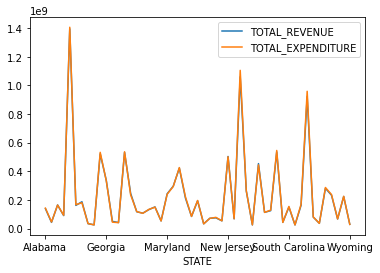

In [ ]:
# Calculate total revenue and expenditure for each state
state_totals = df.groupby('STATE')['TOTAL_REVENUE', 'TOTAL_EXPENDITURE'].sum()

# Print the resulting DataFrame
print(state_totals)
state_totals.plot()

**Total revenue and expenditure for each year**

      TOTAL_REVENUE  TOTAL_EXPENDITURE
YEAR                                  
1992      233210984          237333143
1993      243206654          244202408
1994      250750573          252664869
1995      279277709          281831835
1996      292952786          297740499
1997      311885259          315861220
1998      331730773          336384794
1999      354681711          360474429
2000      379602220          386177409
2001      408404990          417014891
2002      426548936          442685445
2003      447668013          462275098
2004      470489151          481241595
2005      496839635          506626625
2006      529971381          536742833
2007      565776634          569654941
2008      591836483          604581544
2009      600684313          616770225
2010      602881374          614739370
2011      609555659          607600935
2012      604716747          604805382
2013      608067328          608403723
2014      628641027          624718207
2015      653669669      

<AxesSubplot:xlabel='YEAR'>

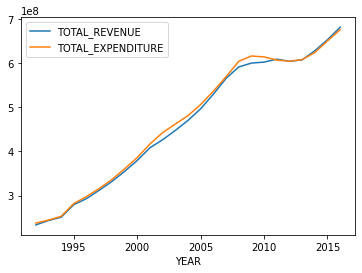

In [ ]:
# Calculate total revenue and expenditure for each year
year_totals = df.groupby('YEAR')['TOTAL_REVENUE', 'TOTAL_EXPENDITURE'].sum()

# Print the resulting DataFrame
print(year_totals)
year_totals.plot()

**2. How does the instructional expenditure ratio vary across states and years?**

              TOTAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
STATE   YEAR                                                              
Alabama 1992        2678885            2653798                  1481703   
        1993        2827391            2833433                  1564558   
        1994        2970223            3103266                  1697593   
        1995        3367437            3353363                  1851700   
        1996        3365113            3572283                  1987018   
...                     ...                ...                      ...   
Wyoming 2012        1664983            1670728                   845801   
        2013        1695967            1675477                   846872   
        2014        1772633            1775999                   865932   
        2015        1962874            1942406                   895910   
        2016        2044669            2034229                   921494   

              INSTRUCTIO

<AxesSubplot:xlabel='STATE,YEAR'>

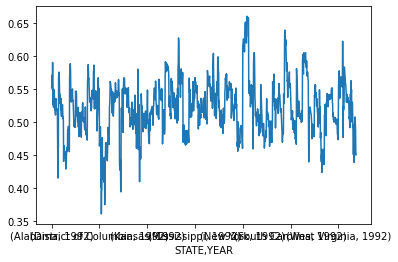

In [ ]:
# Group the data by state and year
grouped_dataa = df.groupby(['STATE', 'YEAR'])

# Calculate total revenue, total expenditure, and total instruction expenditure for each state and year
grouped_dataa = grouped_dataa.agg({'TOTAL_REVENUE': 'sum',
                                 'TOTAL_EXPENDITURE': 'sum',
                                 'INSTRUCTION_EXPENDITURE': 'sum'})

# Calculate the instructional expenditure ratio for each state and year
grouped_dataa['INSTRUCTIONAL_EXPENDITURE_RATIO'] = grouped_dataa['INSTRUCTION_EXPENDITURE'] / grouped_dataa['TOTAL_REVENUE']

# Plot the instructional expenditure ratio for each state and year
print(grouped_dataa)
grouped_dataa['INSTRUCTIONAL_EXPENDITURE_RATIO'].plot()


**3. What is the distribution of federal, state, and local revenue across states and years?**

              FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE
STATE   YEAR                                               
Alabama 1992           304177        1659028         715680
        1993           331409        1729295         766687
        1994           331823        1850894         787506
        1995           328957        2161366         877114
        1996           334858        2138717         891538
...                       ...            ...            ...
Wyoming 2012           144728         851896         668359
        2013           113501         881114         701352
        2014           112709         965213         694711
        2015           120290        1116917         725667
        2016           123012        1175899         745758

[1275 rows x 3 columns]


<AxesSubplot:xlabel='STATE,YEAR'>

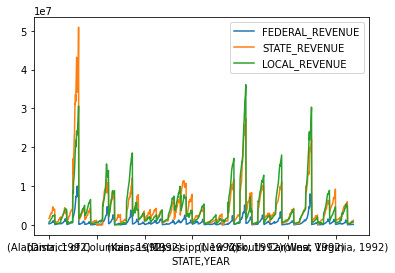

In [ ]:
# Group the data by state and year
grouped_datta = df.groupby(['STATE', 'YEAR'])

# Calculate total federal, state, and local revenue for each state and year
grouped_datta = grouped_datta.agg({'FEDERAL_REVENUE': 'sum',
                                 'STATE_REVENUE': 'sum',
                                 'LOCAL_REVENUE': 'sum'})

# Plot the total federal, state, and local revenue for each state and year
print(grouped_datta)
grouped_datta.plot()


**4. Are there any trends or patterns in the educational finance data that can be identified?**

             TOTAL_REVENUE     TOTAL_EXPENDITURE     INSTRUCTION_EXPENDITURE  \
                      mean std              mean std                    mean   
STATE   YEAR                                                                   
Alabama 1992     2678885.0 NaN         2653798.0 NaN               1481703.0   
        1993     2827391.0 NaN         2833433.0 NaN               1564558.0   
        1994     2970223.0 NaN         3103266.0 NaN               1697593.0   
        1995     3367437.0 NaN         3353363.0 NaN               1851700.0   
        1996     3365113.0 NaN         3572283.0 NaN               1987018.0   
...                    ...  ..               ...  ..                     ...   
Wyoming 2012     1664983.0 NaN         1670728.0 NaN                845801.0   
        2013     1695967.0 NaN         1675477.0 NaN                846872.0   
        2014     1772633.0 NaN         1775999.0 NaN                865932.0   
        2015     1962874.0 NaN         1

<AxesSubplot:xlabel='STATE,YEAR'>

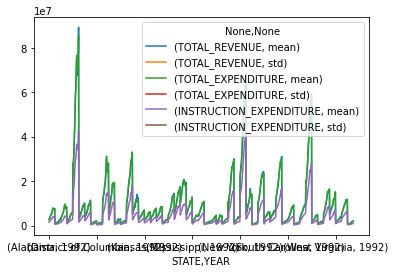

In [ ]:
# Group the data by state and year
grouped_dattta = df.groupby(['STATE', 'YEAR'])

# Calculate summary statistics for the educational finance data
summary = grouped_dattta.agg({'TOTAL_REVENUE': ['mean', 'std'],
                            'TOTAL_EXPENDITURE': ['mean', 'std'],
                            'INSTRUCTION_EXPENDITURE': ['mean', 'std']})

# Plot the summary statistics to look for trends or patterns
print(summary)
summary.plot()


**5. How does the instructional expenditure per student vary across states and years?**

              INSTRUCTION_EXPENDITURE         ENROLL  \
STATE   YEAR                                           
Alabama 1992                  1481703  917541.566176   
        1993                  1564558  727716.000000   
        1994                  1697593  730004.000000   
        1995                  1851700  727480.000000   
        1996                  1987018  735912.000000   
...                               ...            ...   
Wyoming 2012                   845801   89994.000000   
        2013                   846872   91533.000000   
        2014                   865932   92732.000000   
        2015                   895910   93867.000000   
        2016                   921494   94511.000000   

              INSTRUCTIONAL_EXPENDITURE_PER_STUDENT  
STATE   YEAR                                         
Alabama 1992                               1.614862  
        1993                               2.149957  
        1994                               2.325457  
 

<AxesSubplot:xlabel='STATE,YEAR'>

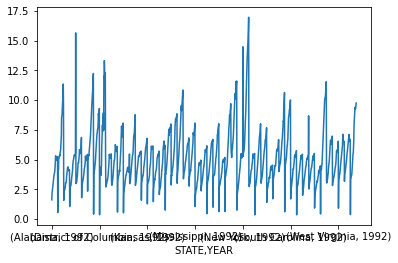

In [ ]:
# Group the data by state and year
grouped_data = df.groupby(['STATE', 'YEAR'])

# Calculate instructional expenditure per student for each state and year
grouped_data = grouped_data.agg({'INSTRUCTION_EXPENDITURE': 'sum', 'ENROLL': 'mean'})
grouped_data['INSTRUCTIONAL_EXPENDITURE_PER_STUDENT'] = grouped_data['INSTRUCTION_EXPENDITURE'] / grouped_data['ENROLL']

# Plot the instructional expenditure per student for each state and year
print(grouped_data)
grouped_data['INSTRUCTIONAL_EXPENDITURE_PER_STUDENT'].plot()


**6. How does the total expenditure per student compare to the national average?**

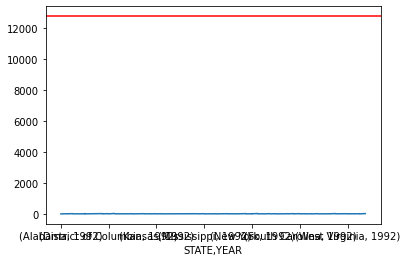

In [ ]:
# Group the data by state and year
grouped_data = df.groupby(['STATE', 'YEAR'])

# Calculate total expenditure per student for each state and year
grouped_data = grouped_data.agg({'TOTAL_EXPENDITURE': 'sum', 'ENROLL': 'mean'})
grouped_data['TOTAL_EXPENDITURE_PER_STUDENT'] = grouped_data['TOTAL_EXPENDITURE'] / grouped_data['ENROLL']

# Calculate the national average total expenditure per student
national_average = df['TOTAL_EXPENDITURE'].sum() / df['ENROLL'].mean()

# Compare the total expenditure per student for each state and year to the national average
grouped_data['TOTAL_EXPENDITURE_PER_STUDENT'].plot()
plt.axhline(y=national_average, color='r', linestyle='-')


**7. Are there any states that have consistently high or low instructional expenditure ratios?**

STATE
Alabama                 0.534024
Alaska                  0.519717
Arizona                 0.457753
Arkansas                0.532975
California              0.505926
Colorado                0.499572
Connecticut             0.545368
Delaware                0.537665
District of Columbia    0.432031
Florida                 0.492233
Georgia                 0.536230
Hawaii                  0.500243
Idaho                   0.544097
Illinois                0.508895
Indiana                 0.477399
Iowa                    0.505840
Kansas                  0.505533
Kentucky                0.526309
Louisiana               0.523431
Maine                   0.559937
Maryland                0.536465
Massachusetts           0.566161
Michigan                0.480498
Minnesota               0.530112
Mississippi             0.530437
Missouri                0.522009
Montana                 0.550631
Nebraska                0.552431
Nevada                  0.503728
New Hampshire           0.554492
New 

<AxesSubplot:xlabel='STATE'>

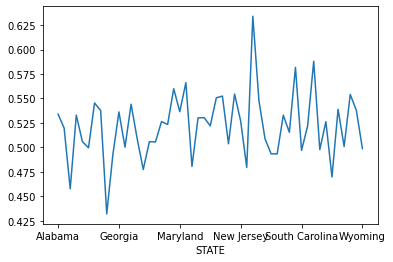

In [ ]:
# Group the data by state and year
grouped_data = df.groupby(['STATE', 'YEAR'])

# Calculate total revenue, total expenditure, and total instruction expenditure for each state and year
grouped_data = grouped_data.agg({'TOTAL_REVENUE': 'sum',
                                 'TOTAL_EXPENDITURE': 'sum',
                                 'INSTRUCTION_EXPENDITURE': 'sum'})

# Calculate the instructional expenditure ratio for each state and year
grouped_data['INSTRUCTIONAL_EXPENDITURE_RATIO'] = grouped_data['INSTRUCTION_EXPENDITURE'] / grouped_data['TOTAL_REVENUE']

# Group the data by state and calculate the mean instructional expenditure ratio for each state
mean_ratios = grouped_data.groupby('STATE')['INSTRUCTIONAL_EXPENDITURE_RATIO'].mean()

# Plot the mean instructional expenditure ratio for each state
print(mean_ratios)
mean_ratios.plot()


**8. What is the overall financial performance of the educational system in each state?**

            TOTAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
STATE                                                                   
Alabama        5545854.92         5690278.88               2937209.32   
Alaska         1720039.64         1817666.40                892252.12   
Arizona        6577442.12         6549709.12               3024480.36   
Arkansas       3611403.96         3707725.96               1887682.80   
California    55799199.28        56247851.32              27882975.88   

            INSTRUCTIONAL_EXPENDITURE_RATIO  EXPENDITURE_TO_REVENUE_RATIO  
STATE                                                                      
Alabama                            0.534024                      1.024497  
Alaska                             0.519717                      1.057837  
Arizona                            0.457753                      1.001807  
Arkansas                           0.532975                      1.023164  
California                      

<AxesSubplot:xlabel='STATE'>

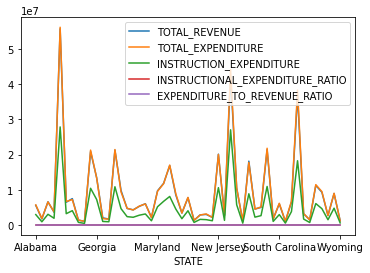

In [ ]:
# Group the data by state and year
grouped_data = df.groupby(['STATE', 'YEAR'])

# Calculate total revenue, total expenditure, and total instruction expenditure for each state and year
grouped_data = grouped_data.agg({'TOTAL_REVENUE': 'sum',
                                 'TOTAL_EXPENDITURE': 'sum',
                                 'INSTRUCTION_EXPENDITURE': 'sum'})

# Calculate performance metrics for the educational system in each state
grouped_data['INSTRUCTIONAL_EXPENDITURE_RATIO'] = grouped_data['INSTRUCTION_EXPENDITURE'] / grouped_data['TOTAL_REVENUE']
grouped_data['EXPENDITURE_TO_REVENUE_RATIO'] = grouped_data['TOTAL_EXPENDITURE'] / grouped_data['TOTAL_REVENUE']

# Group the data by state and calculate the mean performance metrics for each state
mean_metrics = grouped_data.groupby('STATE').mean()

# Plot the performance metrics for each state
print(mean_metrics.head())
mean_metrics.plot()


**9. What is the Total Revenue/Expenditure trend for top 10 most populated states in the US over time?**

In [ ]:
# Create a pivot table that shows the total revenue and total expenditure for each state and year
pivot_table = df.pivot_table(index=['STATE', 'YEAR'], values=['TOTAL_REVENUE', 'TOTAL_EXPENDITURE'])

# Print the pivot table
print(pivot_table)


              TOTAL_EXPENDITURE  TOTAL_REVENUE
STATE   YEAR                                  
Alabama 1992            2653798        2678885
        1993            2833433        2827391
        1994            3103266        2970223
        1995            3353363        3367437
        1996            3572283        3365113
...                         ...            ...
Wyoming 2012            1670728        1664983
        2013            1675477        1695967
        2014            1775999        1772633
        2015            1942406        1962874
        2016            2034229        2044669

[1275 rows x 2 columns]


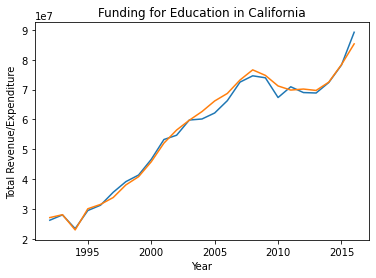

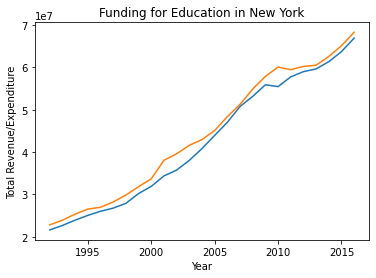

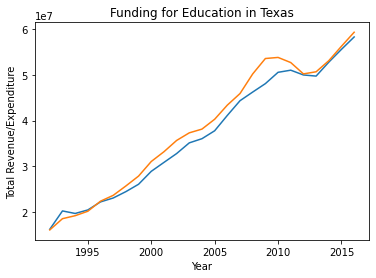

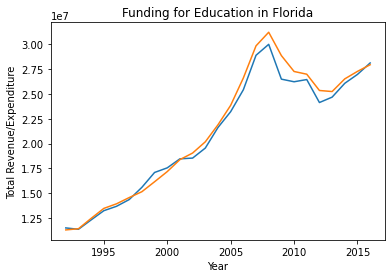

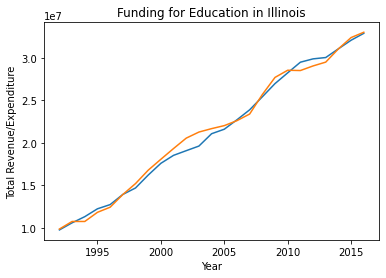

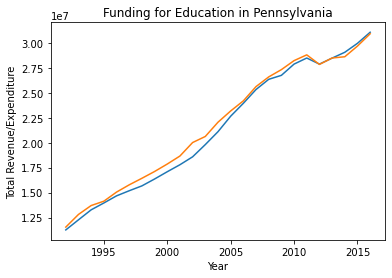

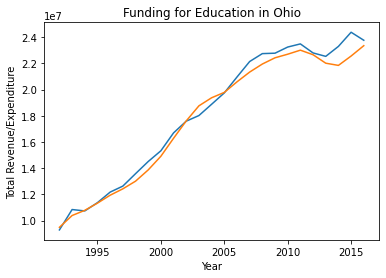

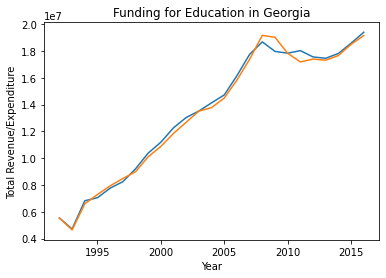

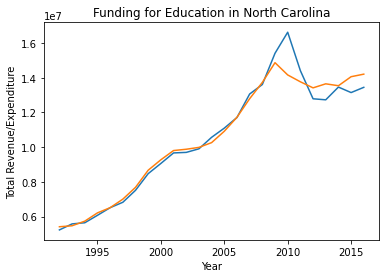

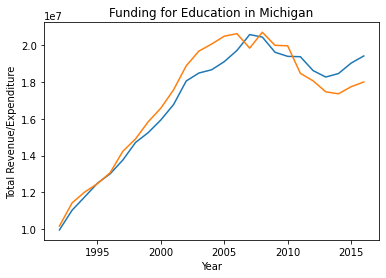

In [ ]:
# List of top 10 most populated states to plot
states = ['California', 'New York', 'Texas', 'Florida', 'Illinois', 'Pennsylvania', 'Ohio', 'Georgia', 'North Carolina', 'Michigan']

# Loop through the list of states
for state in states:
  # Select the data for the state from the pivot table
  state_data = pivot_table.loc[state]

  # Plot the total revenue and total expenditure for the selected state over time
  plt.plot(state_data['TOTAL_REVENUE'])
  plt.plot(state_data['TOTAL_EXPENDITURE'])
  plt.xlabel('Year')
  plt.ylabel('Total Revenue/Expenditure')
  plt.title(f'Funding for Education in {state}')
  plt.show()

#### **Conclusion** <a class="anchor" id="c"></a>

Our analysis has shown that there is a strong correlation between the total revenue and total expenditure for each state, and we have also explored the relationship between the enrollment, federal, state, and local revenue for each state. In addition, we have looked at how the funding for education has changed over time and compared the funding for education in different states. 

Overall, this dataset provides a wealth of information about the funding for education in the United States and can be used to gain insights and drive decision-making in the education sector.

**Note: Remember that correlation between some data does not necessarily indicate causality, therefore we need to back up these findings with other evidence.**